# Lineaire regressie - _ordinary least squares_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn import linear_model

In [2]:
personen = pd.DataFrame({'lengte': [1.678, 1.755, 1.764, 1.821, 1.809, 1.851, 1.848, 1.902], 
                         'gewicht': [62.2, 67.2, 72.7, 76.4, 75.2, 81.3, 87.4, 90.4]})

In [3]:
r = personen['gewicht'].corr(personen['lengte'])
print(f'Pearsons correlatiecoëfficient r = {r}')

Pearsons correlatiecoëfficient r = 0.9573607425326734


## Lineaire formule

Zoek de _beste_ lineaire formule die het gewicht $y$ voorspelt gegeven lengte $x$ met richtingscoëfficient $a$ en intercept $b$. Je vindt de beste formule door de _sum of squared residuals_ (SSR, de som van het kwadraat van de residuen) te minimaliseren. Maak hiervoor gebruik van de grafiek die hieronder getekend wordt. De verticale rode lijnen representeren het residu bij elke meetwaarde.

In [38]:
# x-as loopt van minimum van lengte tot maximum van lengte
x = np.linspace((personen[['lengte']].min()-.03), personen[['lengte']].max()+.03)

In [8]:
# Geef hier de beste formule
a = 1
b = 0
y = a*x+b

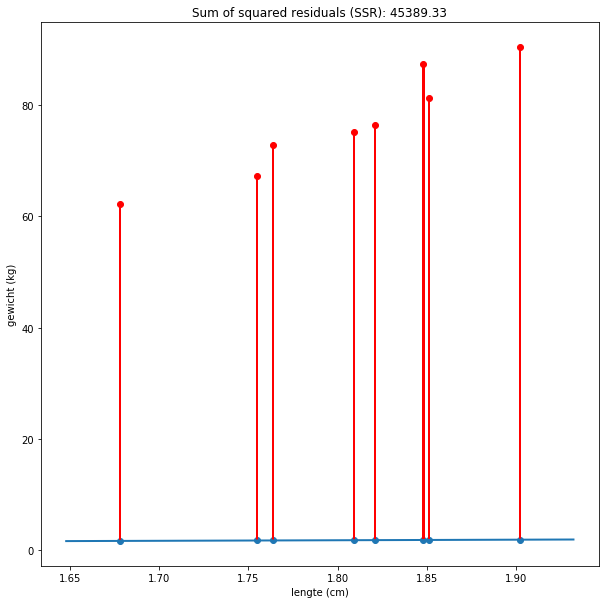

In [9]:
# Make predictions
personen['gewicht_voorspeld'] = a * personen[['lengte']] + b 
personen['residu'] = (personen['gewicht_voorspeld'] - personen['gewicht'])
personen['square'] = personen['residu']**2
ssr = personen['square'].sum()

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

plt.title('Sum of squared residuals (SSR): {:.2f}'.format(ssr))
plt.xlabel('lengte (cm)')
plt.ylabel('gewicht (kg)')

ratio = (x.max()-x.min())/(y.max()-y.min())

ax.plot(x,y, linewidth=2)
ax.scatter(personen['lengte'], personen['gewicht_voorspeld'])
ax.scatter(personen['lengte'], personen['gewicht'], c='r')

# Create a Rectangle patch
for index, persoon in personen.iterrows():
    if ssr < 500:
        rect = patches.Rectangle((persoon['lengte'], persoon['gewicht']),
                                 persoon['residu']*ratio, persoon['residu'],
                                 linewidth=1,edgecolor='r', facecolor='r', alpha=.3)
        ax.add_patch(rect)
        
    rect = patches.Rectangle((persoon['lengte'], persoon['gewicht']),
                             0.00005, persoon['residu'],
                             linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()

In [10]:
personen

,lengte,gewicht,gewicht_linreg,gewicht_voorspeld,residu,square
0,1.678,62.2,60.073627,1.678,-60.522,3662.912484
1,1.755,67.2,70.213314,1.755,-65.445,4283.048025
2,1.764,72.7,71.398472,1.764,-70.936,5031.916096
3,1.821,76.4,78.904474,1.821,-74.579,5562.027241
4,1.809,75.2,77.324263,1.809,-73.391,5386.238881
5,1.851,81.3,82.855002,1.851,-79.449,6312.143601
6,1.848,87.4,82.459949,1.848,-85.552,7319.144704
7,1.902,90.4,89.570898,1.902,-88.498,7831.896004


In [36]:
personen['lengte2'] = personen['lengte']**2
personen['lengte3'] = personen['lengte']**3
personen['lengte4'] = personen['lengte']**4
personen['lengte5'] = personen['lengte']**5
personen['lengte6'] = personen['lengte']**6
personen

,lengte,gewicht,gewicht_linreg,gewicht_voorspeld,residu,square,lengte2,lengte3,lengte4,lengte5,lengte6
0,1.678,62.2,60.073627,1.678,-60.522,3662.912484,2.815684,4.724718,7.928076,13.303312,22.322958
1,1.755,67.2,70.213314,1.755,-65.445,4283.048025,3.080025,5.405444,9.486554,16.648902,29.218823
2,1.764,72.7,71.398472,1.764,-70.936,5031.916096,3.111696,5.489032,9.682652,17.080198,30.129469
3,1.821,76.4,78.904474,1.821,-74.579,5562.027241,3.316041,6.038511,10.996128,20.023949,36.463611
4,1.809,75.2,77.324263,1.809,-73.391,5386.238881,3.272481,5.919918,10.709132,19.372820,35.045431
5,1.851,81.3,82.855002,1.851,-79.449,6312.143601,3.426201,6.341898,11.738853,21.728617,40.219671
6,1.848,87.4,82.459949,1.848,-85.552,7319.144704,3.415104,6.311112,11.662935,21.553104,39.830137
7,1.902,90.4,89.570898,1.902,-88.498,7831.896004,3.617604,6.880683,13.087059,24.891586,47.343796


In [37]:
reg_pol = linear_model.LinearRegression()
reg_pol.fit(personen[['lengte', 'lengte2', 'lengte3', 'lengte4', 'lengte5', 'lengte6']], personen[['gewicht']])
#print(f'y = {reg.coef_[0][0]} x + {reg.intercept_[0]}')
#personen['gewicht_linreg'] = reg.predict(personen[['lengte']])

a1, a2, a3, a4, a5, a6, b = reg_pol.coef_[0][0], reg_pol.coef_[0][1], reg_pol.coef_[0][2], reg_pol.coef_[0][3], reg_pol.coef_[0][4], reg_pol.coef_[0][5], reg_pol.intercept_[0]
y_pol = a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + b
# geeft ssr = 53.59
print(a1, a2, a3, a4, a5, a6, b)

-35744170760.87895 49707403397.16104 -36854989325.89946 15365818790.477856 -3415674890.2525353 316263979.63828975 10706257240.872782


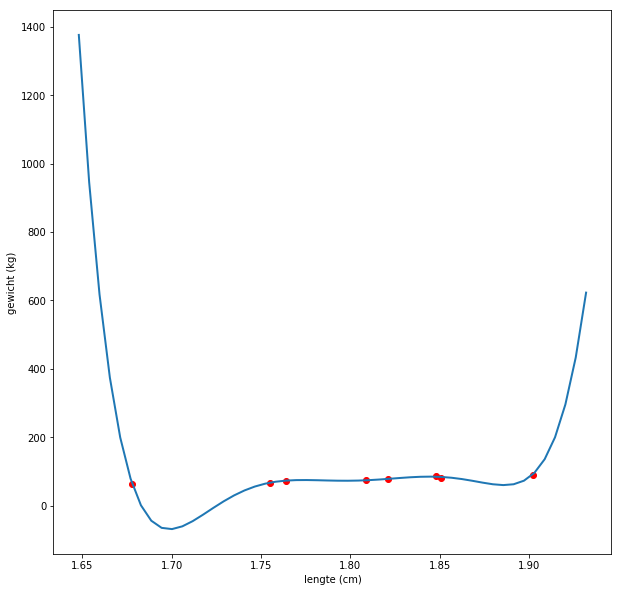

In [39]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

plt.xlabel('lengte (cm)')
plt.ylabel('gewicht (kg)')

ax.scatter(personen['lengte'], personen['gewicht'], c='r')
ax.plot(x, y_pol, linewidth=2)